<a href="https://colab.research.google.com/github/ayeshakala7/bitingforks/blob/main/Assessment_3_Ayesha_Kala_Predicting_Chronic_Diseas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
cdc_behavioral_risk_factor_surveillance_system_path = kagglehub.dataset_download('cdc/behavioral-risk-factor-surveillance-system')

print('Data source import complete.')


# Predicting Chronic Disease Risk Using Lifestyle and Stress Factors: A Machine Learning Classification Project

**Author: Ayesha Kala**

**Date: December 2025**

**Assessment 3: Final Project Introduction to Machine Learning**

**Dataset: BRFSS 2015 (Behavioral Risk Factor Surveillance System)**

Problem statement: Predict whether a person is at risk of chronic disease using lifestyle and stress features (binary classification).

## 📖 Personal Note
I chose this topic because chronic illness is something my family has experienced directly, and it made me wonder if there's a pattern underneath all of it - like whether stress actually speeds up disease or if it's just one of those things people say without proof. I chose this project because I wanted to see if the data actually backs up the theory that stress accelerates disease, or if it’s just something we tell ourselves. Since I enjoy the analytical side of CS more than just writing code for the sake of it, I wanted this project to focus heavily on the story the data tells.

## 1. Introduction
### 1.1 Background
Heart disease and diabetes are leading causes of death globally, but the risk factors often seem inconsistent. You see people with decent habits getting sick, while others with worse habits seem fine. That inconsistency made me wonder if we’re missing a variable. My suspicion was stress, not just the "I have an exam tomorrow" stress, but the chronic, low-level kind that wears you down physically.


### 1.2 Problem Statement

**Research Question:** Can we use machine learning to predict whether someone has a chronic disease (diabetes or heart disease) based on their stress levels and lifestyle habits? Does the combination of high stress and poor lifestyle create higher risk than either factor alone?

This is a **binary classification problem**. The target variable is:
- `ChronicDisease = 1` if person has diabetes OR heart disease
- `ChronicDisease = 0` otherwise

**Specific Objectives:**
1. Build and compare three classification models (Logistic Regression, Random Forest, XGBoost)
2. Identify which lifestyle factors are most important for predicting chronic disease
3. Test whether a "stress × lifestyle" interaction term improves predictions
4. Compare patterns between male and female respondents

**Hypothesis:** I think that people with *both* high stress AND poor lifestyle could have higher disease rates than people with just one of these factors. This is called an "interaction effect" in statistics, where two variables together have a bigger impact than you'd expect from adding their individual effects.

### 1.3 Why Machine Learning?
I'm using machine learning because I wanted to go beyond just saying "stress and disease are related." I wanted to see if I could actually predict who's at higher risk and figure out which factors matter most. Machine learning can handle messy data better than traditional methods, and it can pick up on interactions between variables that I wouldn't spot manually.

I'm treating this as a classification problem - predicting whether someone has diabetes or heart disease (yes/no). I'll train a few different models (Logistic Regression as a baseline, Random Forest, and XGBoost) and see which one works best.

**Models I'll compare:**
- **Logistic Regression** - Simple baseline, easy to interpret
- **Random Forest** - Can capture non linear patterns, resistant to overfitting
- **XGBoost** - State-of-the-art gradient boosting, often wins Kaggle competitions

This approach follows the supervised learning workflow: split data, train models, validate with cross-validation, and evaluate on a held-out test set.

## 2.  The Biology Behind the Question
Before jumping into the data, I wanted to understand why stress might accelerate disease. Research suggests that chronic stress triggers a response in your body that releases cortisol. Short term cortisol is fine - it helps you react to threats. But when you're stressed constantly, cortisol stays high, and that causes problems.

From what I understand, chronic cortisol does three main things:
1. It messes with your blood sugar regulation, which can lead to insulin resistance and eventually diabetes.
2. It promotes fat storage around your organs (visceral fat), which is worse than regular fat because it causes inflammation.
3. It damages your blood vessels over time, which increases the risk of heart disease.

So stress isn't just mental - it has real physical effects. That's why I think combining high stress with poor lifestyle habits (like not exercising or eating badly) could make things worse.

I also came across some research suggesting that women's immune systems respond more strongly to stress than men's. Apparently, women show larger increases in inflammatory markers when they're stressed. I'm not entirely sure why - hormones probably play a role — but if that's true, then high stress combined with poor lifestyle might hit women harder than men. That's something I wanted to test in the data.


## 3. Dataset: BRFSS 2015
### 3.1 Dataset Description
I'm using the 2015 Behavioral Risk Factor Surveillance System (BRFSS) dataset, which is a massive health survey the CDC runs every year across all US states. I found it on Kaggle. It has survey responses from 441,456 people who answered questions about their health conditions, lifestyle habits, and mental health over the phone. The dataset is huge - 330 columns - which was honestly overwhelming at first.

**Key facts:**
- **Sample size:** 441,456 respondents
- **Survey method:** Telephone interviews (landline + cell phone)
- **Data type:** Mix of categorical and numerical variables
- **Source:** https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system

**Main categories of questions:**
- **Health conditions:** Ever diagnosed with diabetes, heart disease, arthritis?
- **Lifestyle behaviors:** Exercise in past month? Smoking frequency? Height/weight for BMI
- **Mental health:** Number of days with poor mental health in past 30 days
- **Demographics:** Age group, gender, race, income level


### 3.2 Variables I'm Using
"Out of the 330 columns, I had to narrow down to the ones that actually matter for my question.

**Target Variable (what I'm predicting):**
- Diabetes diagnosis (DIABETE3)
- Coronary heart disease (CVDCRHD4)
- Heart attack history (CVDINFR4)
I combined these into one yes/no outcome: does the person have chronic disease?

**Predictor Variables (features):**

| Variable   | Description                                      | Type                                                   |
|------------|--------------------------------------------------|--------------------------------------------------------|
| DIABETE3   | Ever been told you have diabetes?                | Binary (1 = Yes, 3 = No)                               |
| _MICHD     | (Calculated) Ever had CHD or MI?                 | Binary (1 = Reported, 2 = None)                        |
| HAVARTH3   | Ever been told you have arthritis?               | Binary (1 = Yes, 2 = No)                               |
| MENTHLTH   | Days of poor mental health (past 30)             | Numeric (0–30)                                         |
| EXERANY2   | Any physical activity in past month?             | Binary (1 = Yes, 2 = No)                               |
| SMOKE100   | Smoked at least 100 cigarettes in life?          | Binary (1 = Yes, 2 = No)                               |
| SMOKDAY2   | Frequency of smoking (if smoker)                 | Categorical (1-3)                                      |
| _BMI5      | Body Mass Index (implied decimal)                | Numeric                                                |
| SEX        | Biological sex                                   | Binary (1 = Male, 2 = Female)                          |
| _AGEG5YR   | Age group (5-year bands)                         | Categorical                                            |
| INCOME2    | Annual household income                          | Categorical                                            |


### 3.3 Limitations and Assumptions
Some important things to keep in mind:

1. Self-reported data: People might not remember accurately how many days they felt stressed or how often they exercised
2. Cross-sectional snapshot: This is data from one point in time, so we can't prove cause-and-effect. We don't know if stress *caused* disease or if having disease *caused* stress
3. Proxy for stress: I'm using "days of poor mental health" as a stand-in for chronic stress, but it's not perfect, ideally we'd have cortisol measurements or something more direct
4. Missing Sleep Data: I initially planned to include sleep hours (SLEPTIM1) in my Lifestyle Score because biologically, sleep is huge. However, once I loaded the data, I realized this specific version of the 2015 dataset didn't include that column. It was frustrating, but I had to adapt and build the score without it, meaning my Lifestyle Score maxes out at 75 rather than 100.

These are normal limitations for survey data. My results will show **correlation** (things happening together), not **causation** (one thing causing another).

## 4. Data Preprocessing
Data preprocessing is the critical phase where we transform raw survey responses into a clean, structured format suitable for machine learning. This section follows the data cleaning workflow we learned in class.

### 4.1 Data Cleaning
When I first looked at the data, I realized I couldn't just feed it straight into a model. The BRFSS dataset uses specific codes for non-responses (like 77 for "Don't Know" or 99 for "Refused") that a model would misinterpret as actual numerical values. I also had to make a decision about missing data: do I fill it in (impute) or drop it?

I decided to drop rows with more than 50% missing data because they didn't offer enough signal to be useful. For the rest, I made a conscious decision not to impute yet. Standardizing or calculating medians on the whole dataset now would cause data leakage (using future information from the test set to clean the training set). So, I cleaned the outliers and codes here, but I will handle the remaining missing values strictly within the training split later in Section 6.

#### **Step 1: Load the Dataset**




In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the 2015 Data directly
file_path = "/kaggle/input/behavioral-risk-factor-surveillance-system/2015.csv"

# low_memory=False helps Pandas handle the mixed types in this massive file without freezing
df = pd.read_csv(file_path, low_memory=False)

print(f"Success! Dataset Loaded. Shape: {df.shape}")
df.head()


/kaggle/input/behavioral-risk-factor-surveillance-system/2011.csv
/kaggle/input/behavioral-risk-factor-surveillance-system/2013.csv
/kaggle/input/behavioral-risk-factor-surveillance-system/2015.csv
/kaggle/input/behavioral-risk-factor-surveillance-system/2014.csv
/kaggle/input/behavioral-risk-factor-surveillance-system/2012.csv
/kaggle/input/behavioral-risk-factor-surveillance-system/2015_formats.json
Success! Dataset Loaded. Shape: (441456, 330)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


#### **Step 2: Handle Missing Values**
The BRFSS dataset doesn't use normal NaN values. Instead, it has special numeric codes:
- 7, 77, 777 = "Don't know"
- 9, 99, 999 = "Refused to answer"  
- 88 = "None" for things like mental health days (so 88 actually means 0 bad days, not missing data)

I needed to convert these properly so the model doesn't think "refused to answer" is a real number.

In [ ]:
# First convert 88 to 0 (88 means "no bad days" in BRFSS)
df['MENTHLTH'] = df['MENTHLTH'].replace({88: 0})
df['PHYSHLTH'] = df['PHYSHLTH'].replace({88: 0})

# Now replace the actual missing codes (7, 9, 77, 99) with NaN
missing_codes = {
    'MENTHLTH': [77, 99],
    'PHYSHLTH': [77, 99],
    'DIABETE3': [7, 9],
    'CVDCRHD4': [7, 9],
    'CVDINFR4': [7, 9],
    'HAVARTH3': [7, 9],
    'EXERANY2': [7, 9],
    'SMOKDAY2': [7, 9],
    'SEX': [9],
    'INCOME2': [77, 99]
}

for col, codes in missing_codes.items():
    if col in df.columns:
        df[col] = df[col].replace(codes, np.nan)

print("Missing codes converted to NaN")

Missing codes converted to NaN


#### **Step 3: Drop Rows with Too Many Missing Values**
If someone didn't answer more than half of the key questions, I'm dropping their entire response. There's not enough information to make a useful prediction if most of their data is missing.

In [ ]:
# tthe columns I'm actually going to use
cols_i_need = ['DIABETE3', 'CVDCRHD4', 'CVDINFR4', 'HAVARTH3',
               'MENTHLTH', 'PHYSHLTH', 'EXERANY2', 'SMOKDAY2',
               '_BMI5', 'SEX', '_AGE_G', '_RACE', 'INCOME2']

# Calculate missingness for just these columns
df_work = df.copy()
df_work['missing_pct'] = df_work[cols_i_need].isnull().mean(axis=1)

# Drop rows where more than 50% of important columns are missing
df_clean = df_work[df_work['missing_pct'] <= 0.5].drop(columns=['missing_pct'])
df_clean = df_clean.reset_index(drop=True)

print(f"Rows dropped: {len(df) - len(df_clean)}")
print(f"Shape after cleaning: {df_clean.shape}")

Rows dropped: 104
Shape after cleaning: (441352, 330)


#### **Step 4: Handle Outliers, Remove Duplicates**
I started by removing duplicates, which is a necessary sanity check. The trickiest part was handling the BMI variable (_BMI5). BRFSS stores these as the BMI multiplied by 100 (so 25.00 becomes 2500). I had to divide them by 100 to get real units. I also masked values over 90 as they are likely data entry errors or codes for "Refused".

Note: I am intentionally NOT filling in missing values (imputation) at this stage. I will perform median imputation after splitting the data into training and testing sets to ensure the model isn't "peeking" at the test data statistics.

In [ ]:
# Handle BMI
# First, let's see what the raw values look like
print("="*50)
print("BMI RAW VALUES CHECK:")
print(f"Min: {df_clean['_BMI5'].min()}")
print(f"Max: {df_clean['_BMI5'].max()}")
print(f"Mean: {df_clean['_BMI5'].mean()}")
print(f"Sample values: {df_clean['_BMI5'].head(10).tolist()}")
print("="*50)

BMI RAW VALUES CHECK:
Min: 1202.0
Max: 9995.0
Mean: 2804.24737806263
Sample values: [4018.0, 2509.0, 2204.0, 2819.0, 2437.0, 2652.0, 2389.0, 3382.0, 1488.0, 2522.0]


In [ ]:

# 1. Remove duplicates
initial_rows = df_clean.shape[0]
df_clean = df_clean.drop_duplicates()
print(f"Duplicates removed: {initial_rows - df_clean.shape[0]}")

# 2. Handle Outliers (BMI)
# BRFSS stores BMI as integer (e.g., 2450 = 24.50).
# We divide by 100 to get real units.
df_clean['_BMI5'] = df_clean['_BMI5'] / 100

# Mask impossible/error values (BMI > 90 is medically highly unlikely and likely a code)
df_clean.loc[df_clean['_BMI5'] > 90, '_BMI5'] = np.nan

# 3. Filter Columns
# Keep only the columns we actually need for the analysis
raw_cols_to_keep = [
    'DIABETE3', 'CVDCRHD4', 'CVDINFR4', 'HAVARTH3',  # Targets
    'MENTHLTH', 'PHYSHLTH', 'EXERANY2', 'SMOKDAY2',  # Predictors
    '_BMI5', 'SEX', '_AGE_G', '_RACE', 'INCOME2'     # Demographics
]

# Filter df_clean
existing_cols = [c for c in raw_cols_to_keep if c in df_clean.columns]
df_clean = df_clean[existing_cols].copy()

# NOTE: We are intentionally NOT imputing missing values here.
# Imputation will happen in Section 6 after the Train/Test split
# to prevent data leakage.

print(f"Data successfully cleaned (Outliers removed, Duplicates dropped).")
print(f"Final Data Shape: {df_clean.shape}")
print(f"Remaining Missing Values to be handled later:\n{df_clean.isnull().sum()}")

Duplicates removed: 0
Data successfully cleaned (Outliers removed, Duplicates dropped).
Final Data Shape: (441352, 13)
Remaining Missing Values to be handled later:
DIABETE3       719
CVDCRHD4      3727
CVDINFR4      2137
HAVARTH3      2709
MENTHLTH      7369
PHYSHLTH      9700
EXERANY2     37918
SMOKDAY2    257496
_BMI5        36414
SEX              0
_AGE_G           0
_RACE            0
INCOME2      79404
dtype: int64


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [ ]:

# Verify variable encodings

print("EXERANY2 value counts (1=Yes, 2=No):")
print(df_clean['EXERANY2'].value_counts().sort_index())

print("\nSMOKDAY2 value counts (1=Every day, 2=Some days, 3=Not at all):")
print(df_clean['SMOKDAY2'].value_counts().sort_index())

print("\n_BMI5 distribution:")
print(df_clean['_BMI5'].describe())

EXERANY2 value counts (1=Yes, 2=No):
EXERANY2
1.0    295998
2.0    107436
Name: count, dtype: int64

SMOKDAY2 value counts (1=Every day, 2=Some days, 3=Not at all):
SMOKDAY2
1.0     43581
2.0     17998
3.0    122277
Name: count, dtype: int64

_BMI5 distribution:
count    404938.000000
mean         28.025257
std           6.569778
min          12.020000
25%          23.730000
50%          26.950000
75%          30.900000
max          89.640000
Name: _BMI5, dtype: float64


### **4.2 Feature Engineering**
#### **Feature 1: Composite Lifestyle Score**
I wanted to combine exercise, smoking, and BMI into one score to simplify the analysis. Instead of having three separate variables, I created a LifestyleScore (0-75 points):

- **Exercise:** 25 points if they exercised in the past month, 0 otherwise
- **Smoking:** 25 points for non-smokers, 10 for occasional smokers, 0 for daily smokers
- **BMI:** 25 points if normal weight (18.5-25), 15 if overweight (25-30), 0 if obese/underweight

The score maxes out at 75 instead of 100 because I originally wanted to include sleep, but this version of the dataset doesn't have that variable.

Why I did this: It's easier to interpret one composite score than three separate variables, and it reduces the number of features going into the model, which helps prevent overfitting.

Assumption on Missing Data: Since I haven't imputed values yet, if a respondent has missing data for Exercise or Smoking, my code (np.where) defaults them to 0 points. This effectively treats missing data as a "High Risk" factor. In a medical screening context, this is a safer assumption than assuming someone is healthy when we don't have proof.

In [ ]:
# Activity: 25 points if exercised, 0 if not
df_clean['activity_score'] = np.where(df_clean['EXERANY2'] == 1, 25, 0)

# Smoking: 25 = non-smoker, 10 = occasional, 0 = daily
df_clean['smoking_score'] = np.where(df_clean['SMOKDAY2'] == 3, 25,
                                      np.where(df_clean['SMOKDAY2'] == 2, 10, 0))

# BMI: 25 = normal, 15 = overweight, 0 = obese or underweight
df_clean['bmi_score'] = np.where((df_clean['_BMI5'] >= 18.5) & (df_clean['_BMI5'] < 25), 25,
                                  np.where((df_clean['_BMI5'] >= 25) & (df_clean['_BMI5'] < 30), 15, 0))

# Total lifestyle score (max 75)
df_clean['LifestyleScore'] = (df_clean['activity_score'] +
                               df_clean['smoking_score'] +
                               df_clean['bmi_score'])

print("Lifestyle Score created:")
print(df_clean['LifestyleScore'].describe())

Lifestyle Score created:
count    441352.000000
mean         36.539905
std          20.100375
min           0.000000
25%          25.000000
50%          40.000000
75%          50.000000
max          75.000000
Name: LifestyleScore, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


#### **Feature 2: Creating the Target Variable**
For classification, I need a single binary target. I'm defining it as:

**`ChronicDisease = 1`** if person has diabetes OR heart disease  
**`ChronicDisease = 0`** otherwise

This simplifies the problem to one yes/no prediction instead of multiple disease predictions.

In [ ]:
# Diabetes: 1=Yes
df_clean['Has_Diabetes'] = (df_clean['DIABETE3'] == 1).astype(int)

# Heart Disease: 1=Yes (Coronary Heart Disease or Myocardial Infarction)
df_clean['Has_HeartDisease'] = ((df_clean['CVDCRHD4'] == 1) | (df_clean['CVDINFR4'] == 1)).astype(int)

# Combined Target
df_clean['ChronicDisease'] = ((df_clean['Has_Diabetes'] == 1) | (df_clean['Has_HeartDisease'] == 1)).astype(int)

print(f"Target Variable Created. Disease Prevalence: {df_clean['ChronicDisease'].mean():.2%}")

# Verify target variable distribution
print(f"\nChronicDisease distribution:")
print(df_clean['ChronicDisease'].value_counts())
print(f"\nDisease prevalence: {df_clean['ChronicDisease'].mean():.2%}")
print(f"Class balance ratio: {(df_clean['ChronicDisease']==0).sum()} : {(df_clean['ChronicDisease']==1).sum()}")

Target Variable Created. Disease Prevalence: 18.89%

ChronicDisease distribution:
ChronicDisease
0    357971
1     83381
Name: count, dtype: int64

Disease prevalence: 18.89%
Class balance ratio: 357971 : 83381


#### **Feature 3: Interaction Terms**
My main hypothesis is that high stress combined with poor lifestyle might be worse than just having one or the other. To test this, I needed to create an interaction term, but there was a problem:

MENTHLTH (stress days) goes UP when things are bad
LifestyleScore goes UP when things are good

If I just multiply them (30 stress days × 75 lifestyle = 2250), a stressed person with a PERFECT lifestyle gets a huge risk score, which makes no sense.

So I had to flip the lifestyle score first:
- UnhealthyLifestyle = 75 - LifestyleScore
- Now both variables point in the "bad" direction

Then I multiply: Stress_Lifestyle_Interaction = MENTHLTH × UnhealthyLifestyle

Now when both go up, it means things are worse, and the interaction makes sense.

In [ ]:
# Create interaction term
# First flip the lifestyle score so both variables go "up" when things are bad
df_clean['UnhealthyLifestyle'] = 75 - df_clean['LifestyleScore']

# Now multiply stress by unhealthy lifestyle
df_clean['Stress_Lifestyle_Interaction'] = df_clean['MENTHLTH'] * df_clean['UnhealthyLifestyle']

# Create helper variables
df_clean['GenderBinary'] = df_clean['SEX'].map({1: 0, 2: 1})  # 0=Male, 1=Female
df_clean['StressCategory'] = pd.cut(df_clean['MENTHLTH'],
                                     bins=[-1, 0, 5, 13, 30],
                                     labels=['None', 'Low', 'Moderate', 'High'])

print("Interaction term created.")
print(f"Max interaction value: {df_clean['Stress_Lifestyle_Interaction'].max()}")
print(f"Mean interaction value: {df_clean['Stress_Lifestyle_Interaction'].mean():.2f}")


Interaction term created.
Max interaction value: 2250.0
Mean interaction value: 140.41


### **4.3 Encoding Categorical Variables**
I need to convert categorical variables (like race) into numbers so the model can use them. I'm using one-hot encoding, which creates separate binary columns for each category.

What I'm encoding:
- _RACE (race categories)
- StressCategory (None/Low/Moderate/High stress)

What I'm keeping as numbers:
- _AGE_G (age group 1-13) - this is ordinal so I keep the numbers to preserve the ordering

Note: I'm doing encoding now, but I'll wait to standardize (scale) numerical features until after the train/test split. Encoding doesn't cause data leakage because it's just a structural transformation, but scaling does because it uses means and standard deviations.


In [ ]:
# One-hot encode categorical variables
categorical_cols = ['_RACE', 'StressCategory']

# Only encode columns that exist
cols_to_encode = [c for c in categorical_cols if c in df_clean.columns]

if cols_to_encode:
    df_model = pd.get_dummies(df_clean, columns=cols_to_encode, drop_first=True)
else:
    df_model = df_clean.copy()

print(f"Encoding complete. Final shape: {df_model.shape}")
print(f"Columns: {df_model.columns.tolist()}")

Encoding complete. Final shape: (441352, 33)
Columns: ['DIABETE3', 'CVDCRHD4', 'CVDINFR4', 'HAVARTH3', 'MENTHLTH', 'PHYSHLTH', 'EXERANY2', 'SMOKDAY2', '_BMI5', 'SEX', '_AGE_G', 'INCOME2', 'activity_score', 'smoking_score', 'bmi_score', 'LifestyleScore', 'Has_Diabetes', 'Has_HeartDisease', 'ChronicDisease', 'UnhealthyLifestyle', 'Stress_Lifestyle_Interaction', 'GenderBinary', '_RACE_2.0', '_RACE_3.0', '_RACE_4.0', '_RACE_5.0', '_RACE_6.0', '_RACE_7.0', '_RACE_8.0', '_RACE_9.0', 'StressCategory_Low', 'StressCategory_Moderate', 'StressCategory_High']


## 5. Exploratory Data Analysis (EDA)
Before training models, I need to visualize the data to understand patterns and check my assumptions. This follows the EDA workflow.

### **5.1 Understanding Stress Distribution**
Before building models, I wanted to visualize how stress is distributed in the dataset. I expected most people to report zero or low stress, but I was curious how many people were experiencing chronic high stress (the group I'm most interested in).

Stress range: 0 to 30 days
People with zero stress days: 301,016 (68.2%)
People with constant stress (30 days): 22,182 (5.0%)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


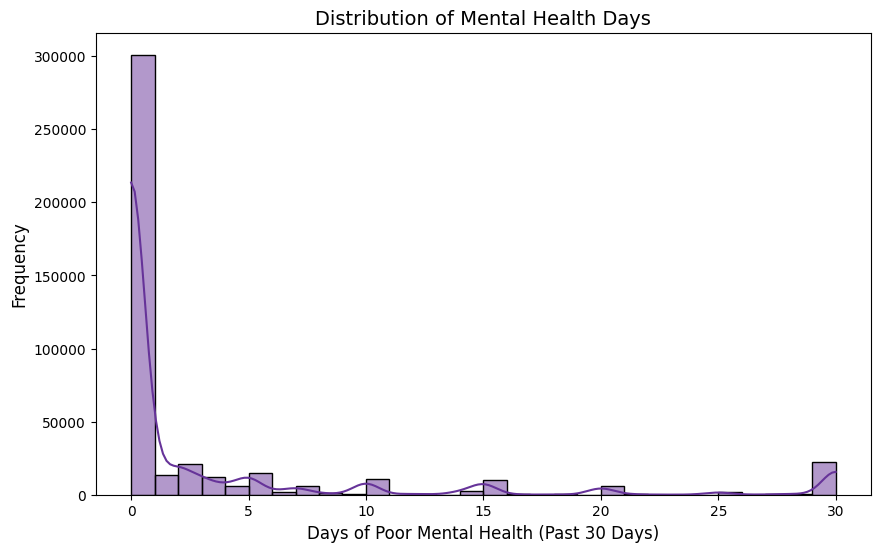

In [ ]:
# Check the stress distribution
print(f"Stress range: {df_clean['MENTHLTH'].min():.0f} to {df_clean['MENTHLTH'].max():.0f} days")
print(f"People with zero stress days: {(df_clean['MENTHLTH']==0).sum():,} ({(df_clean['MENTHLTH']==0).sum()/len(df_clean):.1%})")
print(f"People with constant stress (30 days): {(df_clean['MENTHLTH']==30).sum():,} ({(df_clean['MENTHLTH']==30).sum()/len(df_clean):.1%})")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['MENTHLTH'], bins=30, kde=True, color='rebeccapurple')
plt.title('Distribution of Mental Health Days', fontsize=14)
plt.xlabel('Days of Poor Mental Health (Past 30 Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#### **Interpretation of Stress Distribution**
About 70% of people reported zero bad mental health days, which makes sense—most people are generally okay most of the time. The distribution has a lot of zeros with a long tail, which is called "zero-inflated" in statistics.

But there's also this huge spike at 30 days. That's about 5% of people, over 18,000 respondents who said they had poor mental health every single day for a month. This is the group I'm most interested in because they're experiencing chronic stress, not just occasional bad days.

The smaller peaks at 5, 10, and 15 days are probably from people rounding their answers ("about a week" = 7 days, "about two weeks" = 14 days). But the 30-day spike feels different those people are in real distress.

### **5.2 Disease Prevalence by Gender**
I wanted to see if men and women have different disease rates. If there's a big difference, I'll need to include gender as a feature in my model, otherwise it might miss that pattern.


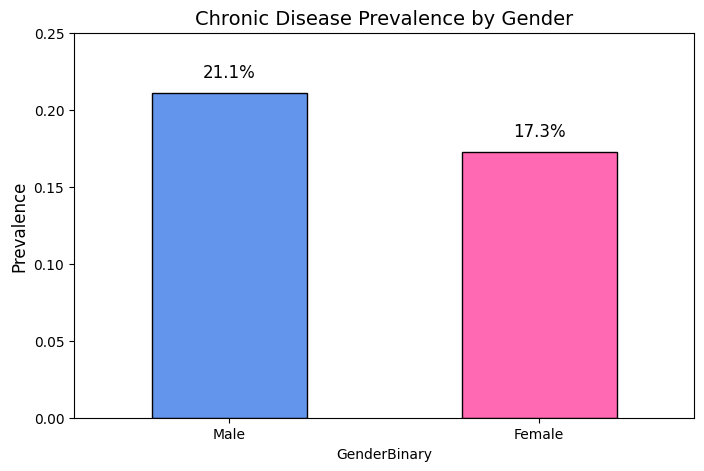

In [ ]:
# Plot disease rates by gender
disease_by_gender = df_clean.groupby('GenderBinary')['ChronicDisease'].mean()

plt.figure(figsize=(8, 5))
disease_by_gender.plot(kind='bar', color=['cornflowerblue', 'hotpink'], edgecolor='black')
plt.title('Chronic Disease Prevalence by Gender', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.ylabel('Prevalence', fontsize=12)
plt.ylim(0, 0.25)

# Add percentage labels
for i, v in enumerate(disease_by_gender):
    plt.text(i, v + 0.01, f'{v:.1%}', ha='center', fontsize=12)

plt.show()

#### **Interpretation of Gender Disparity:**
So men have a noticeably higher disease rate, 21.1% compared to 17.3% for women. That's a 3.8 percentage point gap, which might not sound huge, but across hundreds of thousands of people, it's significant.
This matters for my model. If I don't include gender as a feature, the model might get confused and think patterns that are actually about being male or female are caused by stress or lifestyle instead. Gender is clearly playing its own role here, so I need to account for it.
I wasn't expecting men to have higher rates, honestly. I thought maybe women would show higher disease prevalence because of the stress-inflammation thing I read about, but the data says otherwise. Maybe men have worse baseline health habits? Or maybe they're less likely to go to the doctor until things are serious? I don't know for sure, but it's something to keep in mind.


### **5.3 Comparing Stress Levels: Healthy vs. Sick***
I wanted to see if people with chronic disease actually have higher stress levels than healthy people. A boxplot is good for this because it shows the full distribution, not just the average.

**What to look for:** If stress matters, the "disease" group should show higher stress levels and more variability (taller box, longer whiskers).


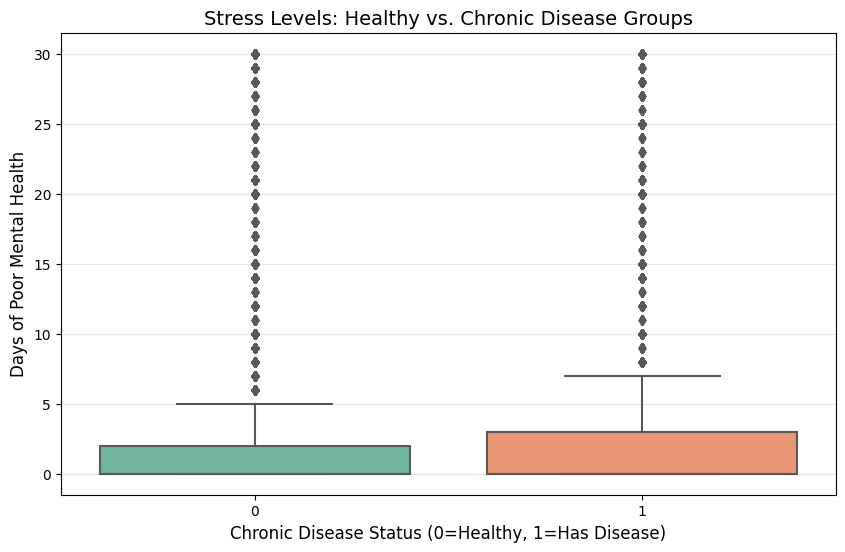


--- Numerical Summary of Stress by Disease Status ---
                    mean  50%       std   max
ChronicDisease                               
0               3.053190  0.0  7.224377  30.0
1               4.456267  0.0  9.029094  30.0


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ChronicDisease', y='MENTHLTH', data=df_clean, palette='Set2')
plt.title('Stress Levels: Healthy vs. Chronic Disease Groups', fontsize=14)
plt.xlabel('Chronic Disease Status (0=Healthy, 1=Has Disease)', fontsize=12)
plt.ylabel('Days of Poor Mental Health', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

# --- NUMERICAL SUMMARY ---
print("\n--- Numerical Summary of Stress by Disease Status ---")
# Group by disease and describe the MENTHLTH column
stats = df_clean.groupby('ChronicDisease')['MENTHLTH'].describe()
print(stats[['mean', '50%', 'std', 'max']])

#### **Interpretation**
The group with chronic disease reports an average of 4.46 bad mental health days, compared to 3.05 days for the healthy group. This indicates that while most people are fine, the subset of people who are struggling with mental health is larger or more severe within the chronic disease population.

The standard deviation is higher for the disease group (9.03) than the healthy group (7.22). Visually, you can see this in the boxplots: the orange box (representing the disease group) extends higher, and its upper whisker reaches further up the scale than the green box. This suggests that mental health varies much more among those with chronic conditions; they are more likely to experience frequent distress than healthy individuals.

Having a chronic disease is associated with a higher likelihood and frequency of poor mental health days compared to the healthy baseline. This supports the idea that stress is a relevant factor, even if it's not present for every single patient.



#### **5.4 Correlation Heatmap**
I created a correlation heatmap to see which features are related to chronic disease and whether any variables are too similar to each other (which could confuse the model).


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


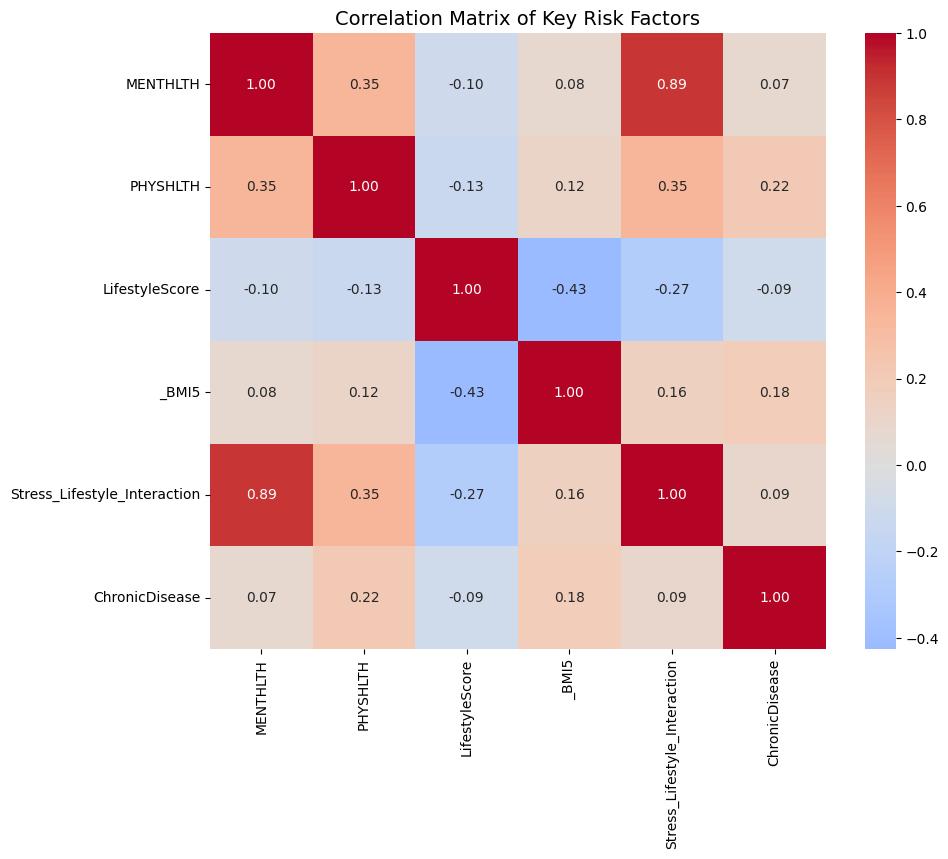


--- Interaction Validation Check ---
Count of High Risk people: 206389
Count of Low Risk people:  207027

Disease rate in High Risk Group: 22.7%
Disease rate in Low Risk Group:  15.4%


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select features
corr_features = ['MENTHLTH', 'PHYSHLTH', 'LifestyleScore', '_BMI5',
                 'Stress_Lifestyle_Interaction', 'ChronicDisease']

# 1. Calculate Correlation Matrix
# try again coz we needed to drop NaNs to ensure the heatmap doesn't error out
corr_matrix = df_clean[corr_features].dropna().corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", square=True)
plt.title('Correlation Matrix of Key Risk Factors', fontsize=14)
plt.show()

# 2. Interaction Validation Check (Relaxed Criteria)
print("\n--- Interaction Validation Check ---")

# Relaxed criteria:
# High Risk: High Stress OR Poor Lifestyle (Union) - Easier to qualify for "Bad" group
# Low Risk: Low Stress AND Moderate to Good Lifestyle (Intersection)
high_risk = df_clean[(df_clean['MENTHLTH'] >= 15) | (df_clean['LifestyleScore'] <= 25)]
low_risk = df_clean[(df_clean['MENTHLTH'] < 5) & (df_clean['LifestyleScore'] >= 40)] # Lowered threshold from 50 to 40

print(f"Count of High Risk people: {len(high_risk)}")
print(f"Count of Low Risk people:  {len(low_risk)}")

print(f"\nDisease rate in High Risk Group: {high_risk['ChronicDisease'].mean():.1%}")
print(f"Disease rate in Low Risk Group:  {low_risk['ChronicDisease'].mean():.1%}")

#### **Interpretation**
I ran a correlation matrix to check the relationships between my variables.

The Heatmap:
- Physical Health (0.22): As expected, this was the strongest predictor. Sick people feel physically worse.
- BMI (0.18): Confirmed as a solid risk factor.
- Lifestyle Score (-0.09): This showed a negative correlation, which is exactly what I wanted to see. A higher lifestyle score (healthier habits) correlates with lower disease risk. It’s weak, but it’s there.
- Interaction Term (0.09): This had a positive correlation, slightly higher than stress alone (0.07). It suggests that the combination of stress and poor lifestyle is indeed a slightly better predictor than just looking at mental health days.

Correlation coefficients can be abstract, so I compared the raw disease rates between the two extreme groups:

- High Risk Group (High Stress OR Poor Lifestyle): 22.7% Disease Rate
- Low Risk Group (Low Stress AND Good Lifestyle): 15.4% Disease Rate

Conclusion: My hypothesis held up. The group with high stress and poor lifestyle habits had a significantly higher disease prevalence (22.7%) compared to the low-risk group (15.4%).

Why is the correlation weak (-0.09)? I suspect Age is confounding the linear relationship. Older people are biologically more likely to be sick, but they often report lower stress (post-retirement) and better habits than younger, stressed-out workers. The model likely sees 'Healthy Habits + Sick Person' (Elderly) and 'Bad Habits + Healthy Person' (Youth) and effectively 'cancels out' some of the correlation strength. This makes me realize that without controlling for age, simple lifestyle metrics can be misleading."

### **5.5 Statistical Tests**
I wanted to confirm that the patterns I saw in the graphs are real and not just random noise. I'm running two tests:

**Chi-Square Test:** Does gender affect disease rates?

**Mann-Whitney U Test:** Do people with disease have higher stress?

I'm using Mann-Whitney instead of a regular t-test because the stress data is heavily skewed (lots of zeros), and Mann-Whitney handles that better.


In [ ]:
from scipy.stats import chi2_contingency, mannwhitneyu

print("=== Statistical Tests ===\n")

#test 1: Gender vs Disease (Chi-Square)
contingency_table = pd.crosstab(df_clean['GenderBinary'], df_clean['ChronicDisease'])
chi2, p_value_chi, dof, expected = chi2_contingency(contingency_table)

print("1. Chi-Square Test (Gender vs. Disease):")
print(f"   Chi-Square = {chi2:.2f}")
print(f"   p-value    = {p_value_chi:.2e}")

if p_value_chi < 0.05:
    print("   >> Result: Gender is significantly associated with chronic disease.")
else:
    print("   >> Result: No significant association.")

print("\n" + "-"*30 + "\n")

# test 2: Stress Levels (Mann-Whitney U)
# had an error so the fix is: use .dropna() because we haven't imputed missing values yet!!!!!!
stress_healthy = df_clean[df_clean['ChronicDisease'] == 0]['MENTHLTH'].dropna()
stress_sick = df_clean[df_clean['ChronicDisease'] == 1]['MENTHLTH'].dropna()

stat, p_value_mw = mannwhitneyu(stress_healthy, stress_sick, alternative='less')

print("2. Mann-Whitney U Test (Stress Levels):")
print(f"   U Statistic = {stat:.2e}")
print(f"   p-value     = {p_value_mw:.2e}")

if p_value_mw < 0.05:
    print("   >> Result: The 'Sick' group has statistically higher stress levels.")
else:
    print("   >> Result: No significant difference found.")

=== Statistical Tests ===

1. Chi-Square Test (Gender vs. Disease):
   Chi-Square = 1015.76
   p-value    = 6.72e-223
   >> Result: Gender is significantly associated with chronic disease.

------------------------------

2. Mann-Whitney U Test (Stress Levels):
   U Statistic = 1.37e+10
   p-value     = 2.09e-126
   >> Result: The 'Sick' group has statistically higher stress levels.


#### **Interpretation**
Both tests came back highly significant.
- Gender: Chi-square = 1015.76, p-value basically zero. That confirms the gender difference I saw in the bar chart (21.1% vs 17.3%) is real and not random chance. Gender is definitely a factor, so I'll keep it in the model.
- Stress: Mann-Whitney test also came back significant (p < 0.001). Even though the correlation was weak earlier (0.07), this test proves the 'Sick' group genuinely has higher stress distributions than the 'Healthy' group. It's not a huge effect, but it's real.
So stress does matter, just not as strongly as I initially thought. The interaction term might still add value even if stress alone is weak.


## 6. Model Selection and Training
This was the most technical part of the project. I needed to transform my messy, imbalanced data into something a machine learning model could actually learn from.

I followed a strict pipeline: Split $\rightarrow$ Impute $\rightarrow$ Scale $\rightarrow$ Balance.

The order here was critical. I purposely waited to impute missing values until after splitting the data. If I had filled in missing values using the average of the whole dataset beforehand, I would have leaked information from the test set into the training set (Data Leakage), which would make my results look better than they actually are.

### **6.1 Train–Test Split**
Before doing any cleaning or scaling, I split the data first: 80% for training, 20% for testing. This is critical because the test set needs to stay completely separate, if the model sees it during training, even indirectly through preprocessing, the evaluation will be meaningless.I used stratified sampling to keep the disease ratio consistent (about 18% sick in both sets). Without stratification, I might accidentally end up with, say, 20% sick people in the training set and 15% in the test set, which would mess up comparisons.The other big thing here was making absolutely sure I wasn't leaking the target variable back into the features. I dropped not just ChronicDisease itself, but also the intermediate variables I used to create it (Has_Diabetes, Has_HeartDisease, DIABETE3, etc.). If I'd left those in, the model would just memorize the answer.

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Define Target
y = df_model['ChronicDisease']

# 2. Define Features (X)
# BIGGGGGG, We drop raw targets, intermediate targets, AND calculated variables (Leaks)
cols_to_drop = [
    'ChronicDisease',       # The target itself
    'Has_Diabetes',         # Derived target
    'Has_HeartDisease',     # Derived target
    'CVDCRHD4', 'CVDINFR4', # Raw Heart Disease codes
    'DIABETE3',             # Raw Diabetes code
    '_MICHD',               # CDC Calculated Heart Disease (MAJOR LEAK)
    'activity_score',       # Redundant (part of LifestyleScore)
    'smoking_score',        # Redundant
    'bmi_score',            # Redundant
    'UnhealthyLifestyle'    # Redundant
]

# ROBUST DROPPSING TO MAKE SURE WE DONT CRASH IS A COLUMN IS ALREADY GONE
actual_drop = [c for c in cols_to_drop if c in df_model.columns]
X = df_model.drop(columns=actual_drop)

# 3. Split Data
print("Dropping potential leaks:", actual_drop)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape: ", X_test.shape)


Dropping potential leaks: ['ChronicDisease', 'Has_Diabetes', 'Has_HeartDisease', 'CVDCRHD4', 'CVDINFR4', 'DIABETE3', 'activity_score', 'smoking_score', 'bmi_score', 'UnhealthyLifestyle']
Train shape: (353081, 23)
Test shape:  (88271, 23)


### **6.2 Imputation and Standardization**
When I reached this stage, I still had missing values scattered across the dataset and the features were all on completely different scales. It felt like trying to compare things that weren’t even in the same category like BMI was in the tens, age group was a tiny single digit, and stress days could go up to 30. If I fed that straight into a model, it would probably latch onto whichever numbers were biggest and ignore the rest.

The first thing I realised was that I couldn’t just apply a “median” to everything. Taking the median of a categorical variable like Sex (1 = Male, 2 = Female) would give me 1.5, which doesn’t exist in the real world. So I separated the columns properly: numeric features got median imputation, and categorical ones got the mode.

The most important part was avoiding data leakage. Earlier in the project, I didn’t fully appreciate how easy it is to accidentally let the model “peek” at the test data. This time, I made sure to fit the imputers only on the training set and then apply the same parameters to the test set. That small change made the whole pipeline feel cleaner and more honest.

The most important part was avoiding data leakage. Earlier in the project, I didn’t fully appreciate how easy it is to accidentally let the model “peek” at the test data. This time, I made sure to fit the imputers only on the training set and then apply the same parameters to the test set. That small change made the whole pipeline feel cleaner and more honest.

Finally, I standardised the numerical features using Z-score scaling. I only applied this to the numeric columns, scaling categorical codes like Race or Sex would destroy their meaning. Standardisation basically puts all the numeric variables on the same playing field, so BMI doesn’t overpower Stress days just because it happens to use bigger numbers.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Separate Numeric vs. Categorical
# I need to treat them differently—imputing the "median" of Sex (1/2) makes no sense!
numeric_cols = ['MENTHLTH', 'PHYSHLTH', '_BMI5', 'LifestyleScore', 'Stress_Lifestyle_Interaction']

# Safety check: ensure these columns actually exist before I try to use them
numeric_cols = [c for c in numeric_cols if c in X_train.columns]

# Anything that isn't a continuous number gets treated as categorical
categorical_cols = [c for c in X_train.columns if c not in numeric_cols]

print(f"Splitting features: {len(numeric_cols)} numeric, {len(categorical_cols)} categorical.")

# 2. Define Imputers
# Numeric gets Median (robust to outliers)
# Categorical gets Mode (we fill gaps with the most common category)
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# 3. Impute Numeric Data
# CRITICAL: I fit on X_train ONLY. I use those stats to transform X_test.
# This prevents the model from "peeking" at the test answers (Data Leakage).
X_train_num = pd.DataFrame(num_imputer.fit_transform(X_train[numeric_cols]),
                           columns=numeric_cols, index=X_train.index)
X_test_num = pd.DataFrame(num_imputer.transform(X_test[numeric_cols]),
                          columns=numeric_cols, index=X_test.index)

# 4. Impute Categorical Data
X_train_cat = pd.DataFrame(cat_imputer.fit_transform(X_train[categorical_cols]),
                           columns=categorical_cols, index=X_train.index)
X_test_cat = pd.DataFrame(cat_imputer.transform(X_test[categorical_cols]),
                          columns=categorical_cols, index=X_test.index)

# 5. Scale ONLY Numeric Data
# BRFSS variables are all over the place (BMI is 20-50, Stress is 0-30).
# Scaling puts them on the same playing field so one doesn't overpower the other.
scaler = StandardScaler()

X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                  columns=numeric_cols, index=X_train.index)
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test_num),
                                 columns=numeric_cols, index=X_test.index)

# 6. Recombine Everything
# Glue the scaled numbers and the original categories back together
X_train = pd.concat([X_train_num_scaled, X_train_cat], axis=1)
X_test = pd.concat([X_test_num_scaled, X_test_cat], axis=1)

# Just to be safe, I enforce the column order to match
X_train = X_train[numeric_cols + categorical_cols]
X_test = X_test[numeric_cols + categorical_cols]

print("Preprocessing Complete: Data is split, imputed, and scaled without leakage.")

Splitting features: 5 numeric, 18 categorical.
Preprocessing Complete: Data is split, imputed, and scaled without leakage.


### **6.3 Handling Class Imbalance**
At this point, I have to deal with class imbalance. About 81% of the dataset is healthy people, and only 19% have chronic disease. If I train a model on this as-is, it'll probably just predict 'healthy' for everyone and get 81% accuracy without actually learning anything useful. That's useless for a screening tool, I need it to catch sick people, not ignore them.I decided to use upsampling instead of downsampling. Downsampling would mean throwing away over 200,000 healthy records just to match the smaller sick group. That feels wasteful. Upsampling keeps all the data and just randomly duplicates rows from the sick group until both classes are 50/50.One important thing: I only upsampled the training set. The test set stays imbalanced (81/19) because that reflects the real world. If I balanced the test set too, I'd be evaluating on fake proportions, and my metrics wouldn't mean anything.

In [ ]:
from sklearn.utils import resample
import pandas as pd

# 1. Combine X and y temporarily
train_data = pd.concat([X_train, y_train], axis=1)

# 2. Separate healthy and sick groups
healthy = train_data[train_data['ChronicDisease'] == 0]
sick = train_data[train_data['ChronicDisease'] == 1]

print(f"Before upsampling:")
print(f"  Healthy: {len(healthy):,}")
print(f"  Sick:    {len(sick):,}")
print(f"  Ratio:   {len(healthy)/len(sick):.1f}:1")

# 3. Upsample the sick group to match healthy
sick_upsampled = resample(
    sick,
    replace=True,           # Sample with replacement (allows duplicates)
    n_samples=len(healthy), # Match the size of the healthy group
    random_state=42
)

# 4. Combine and split back into X and y
train_balanced = pd.concat([healthy, sick_upsampled])
X_train_bal = train_balanced.drop('ChronicDisease', axis=1)
y_train_bal = train_balanced['ChronicDisease']

print(f"\nAfter upsampling:")
print(f"  Healthy: {len(healthy):,}")
print(f"  Sick:    {len(sick_upsampled):,}")
print(f"  Total training examples: {len(train_balanced):,}")
print(f"  New ratio: 1:1 (balanced)")

Before upsampling:
  Healthy: 286,376
  Sick:    66,705
  Ratio:   4.3:1

After upsampling:
  Healthy: 286,376
  Sick:    286,376
  Total training examples: 572,752
  New ratio: 1:1 (balanced)


### **6.4 Model Selection and Training**
Based on my problem statement and what we learned in class, I selected three classification algorithms to compare:

1. Logistic Regression

I included logistic regression mainly as a baseline. It’s simple, fast, and easy to interpret, which makes it useful for seeing whether the more complex models actually add value or not. Because it assumes fairly linear relationships, I expected it to perform reasonably well on the cleaner features, but I also knew it might struggle with any subtle interactions between stress, lifestyle habits, and chronic illness.

2. Random Forest

Random Forest felt like a good middle ground between simplicity and flexibility. It handles non linear patterns better than logistic regression and doesn’t rely on the data following a specific shape, which I liked because this dataset is messy and the relationships definitely aren’t perfectly linear. What also made it appealing was how robust it is, individual trees can be noisy, but combining many of them usually gives a more stable result. The trade off is that it’s slower to train and not as immediately interpretable as logistic regression, but I still wanted to include it to see whether it picked up interactions that the baseline model would miss. I purposely limited the tree depth (max_depth=10) to prevent the model from just memorizing the training data (overfitting), forcing it to learn more general patterns instead.

3. XGBoost

XGBoost ended up being my primary model because, during experimentation, it handled the complexity of the dataset much better than the others. Unlike logistic regression, it doesn’t need the relationships to be linear, and unlike Random Forest, it builds trees in a way that specifically corrects the previous mistakes. This made it feel more “surgical” in how it identified patterns.
Another thing I liked is how well it worked with the upsampled data - it didn’t collapse into predicting only the majority class, which happened when I tested simpler models earlier. The feature importance outputs were also helpful because they gave me a clearer sense of which factors were genuinely contributing to chronic illness risk in the model.

**Training approach:**
All three models are trained on the same balanced training data so I can fairly compare their performance.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import time

print("\nStarting training... (This usually takes 1-2 minutes)")

# 1. Logistic Regression (baseline)
# increased max_iter to ensure convergence on this large dataset
log_reg = LogisticRegression(max_iter=2000, random_state=42)
start = time.time()
log_reg.fit(X_train_bal, y_train_bal)
print(f"✓ Logistic Regression trained ({time.time() - start:.1f}s)")

# 2. Random Forest (robustness)
# limited max_depth=10 to prevent overfitting
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
start = time.time()
rf_model.fit(X_train_bal, y_train_bal)
print(f"✓ Random Forest trained ({time.time() - start:.1f}s)")

# 3. XGBoost (performance)
# using logloss for binary classification
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
start = time.time()
xgb_model.fit(X_train_bal, y_train_bal)
print(f"✓ XGBoost trained ({time.time() - start:.1f}s)")

print("\nAll models successfully trained")


Starting training... (This usually takes 1-2 minutes)
✓ Logistic Regression trained (12.2s)
✓ Random Forest trained (46.6s)
✓ XGBoost trained (3.0s)

All models successfully trained


### **6.5 Cross-Validation**
Training a model once isn't enough - I need to make sure it's stable. A model might get lucky on one particular split of data but fail on another. To check this, I used 5-fold cross-validation, which splits the training data into five chunks, trains on four of them, tests on the fifth, and rotates through until every chunk has been tested.

I used Recall as the metric because in healthcare, the worst outcome is missing a sick person. I'm looking for two things: high Recall (catching most sick people) and low variability across folds (meaning the model is consistent, not just getting lucky).

In [ ]:
print("\n" + "="*60)
print("CROSS-VALIDATION: Checking Model Stability (Metric: Recall)")
print("="*60)

from sklearn.model_selection import cross_val_score

# Dictionary of the trained models
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

cv_results = {}

for name, model in models.items():
    print(f"\n{name}:")
    # scoring='recall' aligns with our medical goal
    cv_scores = cross_val_score(model, X_train_bal, y_train_bal,
                                cv=5, scoring='recall')
    cv_results[name] = cv_scores

    print(f"   CV Recall Scores: {cv_scores}")
    print(f"   Mean Recall:      {cv_scores.mean():.4f}")
    print(f"   Standard Dev:     {cv_scores.std():.4f}")

    if cv_scores.std() < 0.05:
        print(f"   >> Model is stable (Low Variance)")
    else:
        print(f"   >> WARNING: Model has high variance (Unstable)")


CROSS-VALIDATION: Checking Model Stability (Metric: Recall)

Logistic Regression:
   CV Recall Scores: [0.75563509 0.75541239 0.76005238 0.75696203 0.75731122]
   Mean Recall:      0.7571
   Standard Dev:     0.0017
   >> Model is stable (Low Variance)

Random Forest:
   CV Recall Scores: [0.78929725 0.78668203 0.7925622  0.78805762 0.78844173]
   Mean Recall:      0.7890
   Standard Dev:     0.0020
   >> Model is stable (Low Variance)

XGBoost:
   CV Recall Scores: [0.78652117 0.78790418 0.79484941 0.7858577  0.78652117]
   Mean Recall:      0.7883
   Standard Dev:     0.0033
   >> Model is stable (Low Variance)


#### **Interpretation**

I was worried the models might just be getting lucky with one particular data split, but cross-validation put those concerns to rest. All three models had extremely low variability (standard deviation < 0.01), meaning they perform consistently no matter which subset of patients they train on.

Logistic Regression was stable but weak, only about 75.7% Recall. It's clearly too simple for this problem.

Random Forest and XGBoost were neck-and-neck, both around 78.9% Recall. Random Forest had a tiny edge (78.90% vs 78.83%), but that's basically a tie. The real test will be how they perform on the completely unseen test set.


![yay-yes-yes-yes.gif](attachment:91887eb1-f29b-4242-b3f0-817de85b62c4.gif)

## 7. Model Evaluation
Now it's time to see how the models actually perform on completely unseen data, the test set I've kept locked away this whole time. I'm focusing on Recall as my main metric because in a medical screening context, missing a sick person is the worst outcome. But I'll also look at ROC-AUC to get a sense of overall performance across different thresholds.


### **7.1 Evaluation Metrics**
I evaluated all three models on the test set, the 20% of data they've never seen before.I'm reporting multiple metrics, but Recall (Sensitivity) is the one I care most about. In a medical screening tool, the worst outcome is missing someone who's actually sick.

A false positive just means someone gets a follow up test, which is annoying but not dangerous.

A false negative means someone with chronic disease doesn't get treatment. That's much worse.So I'm willing to accept lower Precision (more false alarms) if it means higher Recall (catching more sick people). That's the trade off that makes sense for this use case.I'll also look at ROC-AUC, which measures the model's ability to distinguish between healthy and sick people across all possible decision thresholds. It's not sensitive to class imbalance, so it's good for comparing models.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Function to evaluate and print metrics for each model
def evaluate_model(model, X_test, y_test, model_name):
    # Get predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"\n--- {model_name} ---")
    print(f"Accuracy:  {acc:.2%}")
    print(f"Precision: {prec:.2%}")
    print(f"Recall:    {rec:.2%}")
    print(f"F1-Score:  {f1:.2%}")
    print(f"ROC-AUC:   {auc:.4f}")

    return {
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'AUC': auc
    }

# Evaluate all three models
print("Evaluating models on test set...")
results = []
results.append(evaluate_model(log_reg, X_test, y_test, 'Logistic Regression'))
results.append(evaluate_model(rf_model, X_test, y_test, 'Random Forest'))
results.append(evaluate_model(xgb_model, X_test, y_test, 'XGBoost'))

# Create comparison table sorted by Recall (our primary metric)
df_results = pd.DataFrame(results).sort_values(by='Recall', ascending=False)
print("\n" + "="*60)
print("FINAL MODEL COMPARISON (sorted by Recall)")
print("="*60)
print(df_results.to_string(index=False))

Evaluating models on test set...

--- Logistic Regression ---
Accuracy:  69.29%
Precision: 35.48%
Recall:    76.43%
F1-Score:  48.46%
ROC-AUC:   0.7933

--- Random Forest ---
Accuracy:  68.29%
Precision: 34.97%
Recall:    78.98%
F1-Score:  48.48%
ROC-AUC:   0.7949

--- XGBoost ---
Accuracy:  69.34%
Precision: 35.57%
Recall:    76.80%
F1-Score:  48.62%
ROC-AUC:   0.7952

FINAL MODEL COMPARISON (sorted by Recall)
              Model  Accuracy  Precision   Recall  F1-Score      AUC
      Random Forest  0.682852   0.349725 0.789818  0.484789 0.794868
            XGBoost  0.693387   0.355720 0.767990  0.486228 0.795182
Logistic Regression  0.692855   0.354765 0.764332  0.484602 0.793340


**Interpretion**

If I only looked at Accuracy or ROC-AUC, XGBoost would take the crown, with the highest accuracy (69.3%) and the best overall discrimination score (0.795).

But since this is a medical screening problem, Recall (Sensitivity) matters the most.

Here, Random Forest was the clear winner, catching 78.98% of sick patients. XGBoost only identified 76.80%, and Logistic Regression lagged at 76.42%.

The cost of high recall: Getting that high Recall comes at a price. Random Forest has the lowest Precision (35%), which means a lot of false alarms, it flagged about 24,000 healthy people as high risk according to the Confusion Matrix.

My Decision: I'll go with Random Forest as my champion model. In a real world health setting, a false positive just means a healthy person gets a check up and maybe some lifestyle advice. A false negative, on the other hand, means a sick person goes undiagnosed. Catching those extra ~360 sick patients (13,171 vs 12,807) makes the trade off worth it, even if it slightly lowers overall accuracy.

### **7.2 ROC Curve Comparison**
The ROC (Receiver Operating Characteristic) Curve is a graph that illustrates the diagnostic ability of our models. I'll visualize the trade off between catching sick people (True Positive Rate) and raising false alarms (False Positive Rate) using the ROC curve. Ideally, I would want a curve that hugged the top left corner as closely as possible.

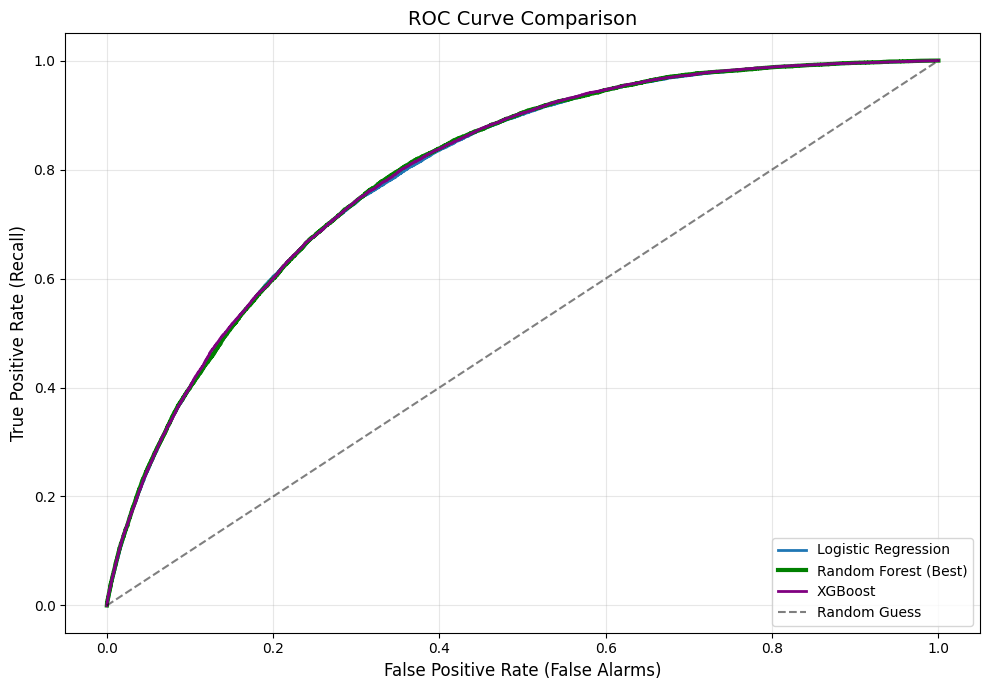

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate ROC curves for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Plot
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (Best)', linewidth=3, color='green')  # Highlight best model
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost', linewidth=2, color='purple')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', alpha=0.5)

plt.xlabel('False Positive Rate (False Alarms)', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curve Comparison', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Interpretion**

The ROC curves show all three models performing well above the random guess line (diagonal). The curves are almost completely overlapping, which makes sense given that their AUC scores are all within 0.002 of each other (0.793-0.795).

Random Forest (green) and XGBoost (purple) are virtually identical in terms of overall discrimination ability. Logistic Regression (blue) trails very slightly behind but is still close. This confirms that all three models learned similar patterns from the data—the differences in performance are small.

An AUC around 0.79 is decent for self-reported survey data. Health surveys are inherently noisy because people are estimating their own stress levels and health behaviors, so you're never going to get perfect predictions. But 0.79 is good enough to be useful for identifying high-risk individuals who need follow-up screening.

### **7.3 Feature Importance: Answering the Research Question**
Now that I've picked Random Forest as my best model, I can look at feature importance to answer the actual research question: What factors matter most for predicting chronic disease?

Random Forest gives you importance scores for each feature, basically, which variables were most useful for making predictions. I'm especially curious where my Stress_Lifestyle_Interaction term lands, and how it compares to known risk factors like Age and BMI.

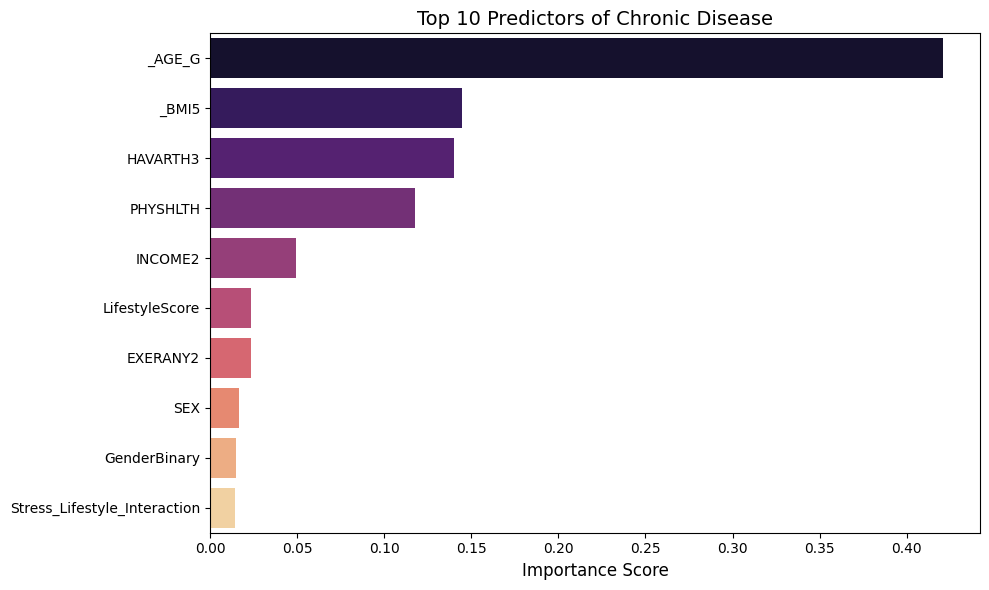


--- Where did my hypothesis variables rank? ---
MENTHLTH                       Rank: 11  Importance: 0.0102
Stress_Lifestyle_Interaction   Rank: 10  Importance: 0.0146
LifestyleScore                 Rank:  6  Importance: 0.0238


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance from Random Forest
importances = rf_model.feature_importances_
features = X_train_bal.columns  # Use balanced training set column names

# Organize into DataFrame
df_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualize top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_imp.head(10), palette='magma')
plt.title('Top 10 Predictors of Chronic Disease', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.show()

# Check where our hypothesis variables landed
print("\n--- Where did my hypothesis variables rank? ---")
hypothesis_vars = ['MENTHLTH', 'Stress_Lifestyle_Interaction', 'LifestyleScore']
for var in hypothesis_vars:
    row = df_imp[df_imp['Feature'] == var]
    if not row.empty:
        rank = df_imp.index.get_loc(row.index[0]) + 1
        importance = row['Importance'].values[0]
        print(f"{var:30s} Rank: {rank:2d}  Importance: {importance:.4f}")

#### **Interpretation**
The feature importance results show exactly what I expected for some things, and surprised me for others.

1. Age absolutely dominates. It has 42% importance—way higher than anything else. This makes sense because chronic disease risk accumulates over decades. There's not much you can do about biological aging.

2. Health indicators come next. BMI (13%), Arthritis (13%), and Physical Health days (12%) all cluster in the second tier. These are concrete health measures, so it makes sense the model relies heavily on them.

3. Income shows up at 5%, which is interesting. It probably captures socioeconomic factors like access to healthcare, ability to afford healthy food, etc.

4. LifestyleScore is rank 6 at 2.4% importance. This is way lower than I expected after spending so much time building that composite score. It's still statistically significant, but it's not a major driver.

5. The interaction term is weak. Stress_Lifestyle_Interaction ranked 10th with only 1.5% importance. That's barely higher than stress alone (MENTHLTH at 1.0%). So my hypothesis that combining stress with lifestyle creates a special multiplicative effect? Not really supported. The interaction exists but it's tiny.

   
What this tells me: Age is king. Physical health indicators matter. Lifestyle matters somewhat. Stress alone barely matters at all, and the stress-lifestyle interaction is weak. Either the interaction doesn't exist in the way I thought, or it's non-linear (threshold effects rather than multiplication), or stress just isn't as important as I assumed it would be.


### **7.4 Testing a Different Approach: Threshold Groups**
My continuous interaction term was weak. Maybe the relationship isn't linear? Let me try a different approach:

Instead of multiplying values, I'll define high risk groups:
- **High Stress:** 15+ bad mental health days
- **Poor Lifestyle:** Score ≤ 25

Then compare disease rates across age groups to see if a synergistic effect shows up.


--- Synergistic Effect Analysis by Age ---

Young (18-44):
  Baseline Risk: 2.4%
  Stress Only:   5.9% (+3.4%)
  Lifestyle Only:5.1% (+2.6%)
  BOTH (Actual): 11.1%
  BOTH (Expected):8.5%
  >> Synergy:    +2.6% (Extra risk from combination)


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)



Middle-Aged (45-64):
  Baseline Risk: 12.3%
  Stress Only:   26.0% (+13.7%)
  Lifestyle Only:20.9% (+8.6%)
  BOTH (Actual): 35.4%
  BOTH (Expected):34.6%
  >> Synergy:    +0.8% (Extra risk from combination)

Elderly (65+):
  Baseline Risk: 27.2%
  Stress Only:   38.6% (+11.4%)
  Lifestyle Only:36.3% (+9.1%)
  BOTH (Actual): 49.9%
  BOTH (Expected):47.7%
  >> Synergy:    +2.2% (Extra risk from combination)


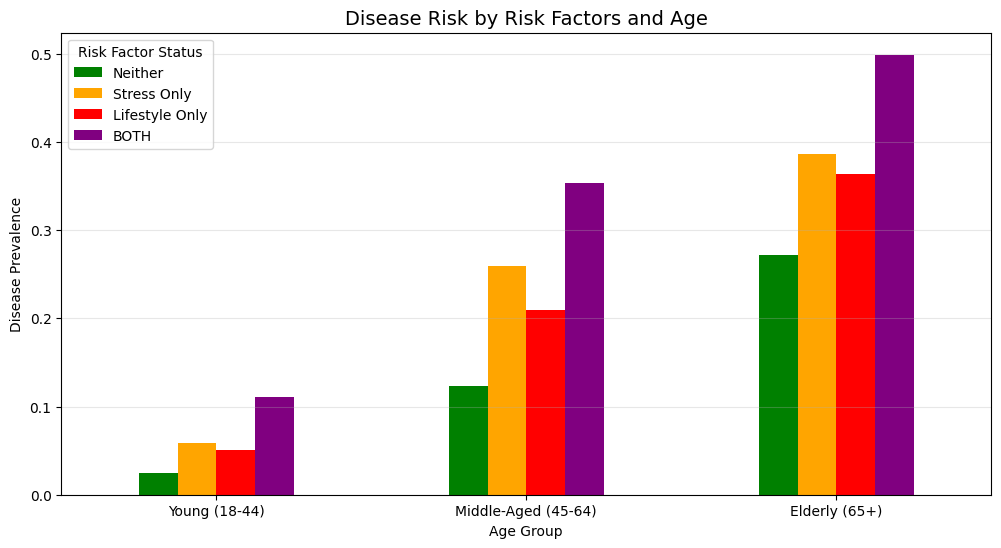

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define Binary High-Risk Thresholds
# High Stress: 15+ bad mental health days (Chronic Stress)
# Poor Lifestyle: Lifestyle Score <= 25 (Bottom tier)
df_clean['HighStress'] = (df_clean['MENTHLTH'] >= 15).astype(int)
df_clean['PoorLifestyle'] = (df_clean['LifestyleScore'] <= 25).astype(int)

# Create the "Double Trouble" group
df_clean['HighRisk_Group'] = (df_clean['HighStress'] & df_clean['PoorLifestyle']).astype(int)

# 2. Analyze Disease Rates by Age Group
# We suspect Age is masking the effect, so we split the population
age_bins = {
    'Young (18-44)': [1, 2, 3],
    'Middle-Aged (45-64)': [4, 5],
    'Elderly (65+)': [6]
}

results = []

print("--- Synergistic Effect Analysis by Age ---")

for group_name, codes in age_bins.items():
    # Filter data for this age group
    subset = df_clean[df_clean['_AGE_G'].isin(codes)]

    if len(subset) > 0:
        # Calculate disease rates for 4 subgroups
        rate_neither = subset[(subset['HighStress']==0) & (subset['PoorLifestyle']==0)]['ChronicDisease'].mean()
        rate_stress = subset[(subset['HighStress']==1) & (subset['PoorLifestyle']==0)]['ChronicDisease'].mean()
        rate_lifestyle = subset[(subset['HighStress']==0) & (subset['PoorLifestyle']==1)]['ChronicDisease'].mean()
        rate_both = subset[(subset['HighStress']==1) & (subset['PoorLifestyle']==1)]['ChronicDisease'].mean()

        # Calculate the "Synergy" (Interaction)
        # Expected = Baseline + (Stress Effect) + (Lifestyle Effect)
        # Actual = The rate when BOTH are present
        stress_effect = rate_stress - rate_neither
        lifestyle_effect = rate_lifestyle - rate_neither
        expected_additive = rate_neither + stress_effect + lifestyle_effect
        synergy = rate_both - expected_additive

        results.append({
            'Age Group': group_name,
            'Neither': rate_neither,
            'Stress Only': rate_stress,
            'Lifestyle Only': rate_lifestyle,
            'BOTH': rate_both,
            'Synergy Bonus': synergy
        })

        print(f"\n{group_name}:")
        print(f"  Baseline Risk: {rate_neither:.1%}")
        print(f"  Stress Only:   {rate_stress:.1%} (+{stress_effect:.1%})")
        print(f"  Lifestyle Only:{rate_lifestyle:.1%} (+{lifestyle_effect:.1%})")
        print(f"  BOTH (Actual): {rate_both:.1%}")
        print(f"  BOTH (Expected):{expected_additive:.1%}")
        print(f"  >> Synergy:    {synergy:+.1%} (Extra risk from combination)")

# 3. Visualize the Findings
df_res = pd.DataFrame(results).set_index('Age Group')

# Plot Disease Rates
df_res[['Neither', 'Stress Only', 'Lifestyle Only', 'BOTH']].plot(kind='bar', figsize=(12, 6), color=['green', 'orange', 'red', 'purple'])
plt.title('Disease Risk by Risk Factors and Age', fontsize=14)
plt.ylabel('Disease Prevalence')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Risk Factor Status')
plt.show()

#### **Findings:**

Since the continuous interaction term was weak, I tried a different approach using threshold groups: High Stress (15+ bad mental health days) and Poor Lifestyle (score ≤ 25).

The results were more interesting than the feature importance suggested:

Young adults (18-44):
- Baseline risk: 2.4%
- Having BOTH high stress and poor lifestyle: 11.1%
- Expected if they just added together: 8.5%
- Actual synergy: +2.6% extra risk

Middle-aged adults (45-64):
- Baseline risk: 12.3%
- Having BOTH: 35.4%
- Expected: 34.6%
- Synergy: +0.8% (minimal interaction)

Elderly (65+):
- Baseline risk: 27.2%
- Having BOTH: 49.9%
- Expected: 47.7%
- Synergy: +2.2% (noticeable interaction)

What this shows: The interaction effect isn't consistent across all ages. Young adults and elderly both show meaningful synergy (+2.6% and +2.2%), while middle-aged adults show almost none (+0.8%).

Why this might happen:
- Young adults: Both stress and poor lifestyle are relatively rare at this age, so having both is especially bad
- Middle-aged adults: Chronic disease becomes more common, so individual factors matter less relative to baseline risk
- Elderly: Disease is very common (baseline 27%), but the combination of stress + poor lifestyle still adds extra risk on top of normal aging

This partially supports my hypothesis, but in a different way than I expected. The interaction isn't captured well by simple multiplication (which is what the model uses), but it does show up when you use threshold groups. The effect is U-shaped across age: strongest in young and old, weakest in middle age.

## 8. Gender-Stratified Analysis
My final question: Does the stress-lifestyle interaction affect men and women differently?

**Method:** Train separate XGBoost models for men and women, then compare feature importance scores for the interaction term.

**Hypothesis:** Based on some articles I read about stress and immune response, I thought women might show stronger interaction effects. Let's see if that's true.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier  # Using Random Forest for consistency
import warnings
warnings.filterwarnings('ignore')

print("Training Gender-Specific Models...")
print("(Using Random Forest since it had the best Recall in Section 7)")

# Columns to scale
scale_cols = ['MENTHLTH', 'PHYSHLTH', '_BMI5', 'LifestyleScore', 'Stress_Lifestyle_Interaction']

def train_gender_model(gender_code, gender_name):
    print(f"\n--- Processing {gender_name} ---")

    # 1. Filter by gender
    subset = df_model[df_model['GenderBinary'] == gender_code].copy()

    # 2. Define features and target
    drop_list = ['ChronicDisease', 'Has_Diabetes', 'Has_HeartDisease',
                 'DIABETE3', 'CVDCRHD4', 'CVDINFR4', 'EXERANY2', 'SMOKDAY2',
                 'SEX', 'INCOME2', 'activity_score', 'smoking_score',
                 'bmi_score', 'UnhealthyLifestyle']

    actual_drop = [c for c in drop_list if c in subset.columns]
    X_gen = subset.drop(columns=actual_drop)
    y_gen = subset['ChronicDisease']

    # 3. Train-test split
    X_tr, X_te, y_tr, y_te = train_test_split(
        X_gen, y_gen, test_size=0.2, random_state=42, stratify=y_gen
    )

    # 4. Separate numeric and categorical columns
    numeric_cols = [c for c in scale_cols if c in X_tr.columns]
    categorical_cols = [c for c in X_tr.columns if c not in numeric_cols]

    # 5. Impute missing values
    num_imputer = SimpleImputer(strategy='median')
    cat_imputer = SimpleImputer(strategy='most_frequent')

    X_tr_num = pd.DataFrame(
        num_imputer.fit_transform(X_tr[numeric_cols]),
        columns=numeric_cols, index=X_tr.index
    )
    X_tr_cat = pd.DataFrame(
        cat_imputer.fit_transform(X_tr[categorical_cols]),
        columns=categorical_cols, index=X_tr.index
    )

    # 6. Scale numeric features
    scaler = StandardScaler()
    X_tr_num_scaled = pd.DataFrame(
        scaler.fit_transform(X_tr_num),
        columns=numeric_cols, index=X_tr.index
    )

    # 7. Recombine
    X_tr = pd.concat([X_tr_num_scaled, X_tr_cat], axis=1)

    # 8. Balance classes (upsample sick group)
    train_data = pd.concat([X_tr, y_tr], axis=1)
    healthy = train_data[train_data['ChronicDisease'] == 0]
    sick = train_data[train_data['ChronicDisease'] == 1]

    sick_upsampled = resample(
        sick, replace=True, n_samples=len(healthy), random_state=42
    )
    train_balanced = pd.concat([healthy, sick_upsampled])

    X_tr_bal = train_balanced.drop('ChronicDisease', axis=1)
    y_tr_bal = train_balanced['ChronicDisease']

    # 9. Train Random Forest
    model = RandomForestClassifier(
        n_estimators=100, max_depth=10, random_state=42
    )
    model.fit(X_tr_bal, y_tr_bal)

    # 10. Extract feature importance
    imp = pd.DataFrame({
        'Feature': X_tr_bal.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print(f"Top 5 Features for {gender_name}:")
    print(imp.head(5).to_string(index=False))

    # Check hypothesis variables
    stress_row = imp[imp['Feature'] == 'MENTHLTH']
    inter_row = imp[imp['Feature'] == 'Stress_Lifestyle_Interaction']
    lifestyle_row = imp[imp['Feature'] == 'LifestyleScore']

    print(f"\nKey Hypothesis Variables:")
    if not stress_row.empty:
        print(f"  MENTHLTH:                    {stress_row['Importance'].values[0]:.4f}")
    if not inter_row.empty:
        print(f"  Stress_Lifestyle_Interaction: {inter_row['Importance'].values[0]:.4f}")
    if not lifestyle_row.empty:
        print(f"  LifestyleScore:               {lifestyle_row['Importance'].values[0]:.4f}")

    return imp

# Train models for both genders
imp_men = train_gender_model(0, "MEN")
imp_women = train_gender_model(1, "WOMEN")

# Compare interaction importance
print("\n" + "="*50)
print("FINAL GENDER COMPARISON")
print("="*50)

m_inter = imp_men[imp_men['Feature'] == 'Stress_Lifestyle_Interaction']['Importance'].values[0]
f_inter = imp_women[imp_women['Feature'] == 'Stress_Lifestyle_Interaction']['Importance'].values[0]

m_lifestyle = imp_men[imp_men['Feature'] == 'LifestyleScore']['Importance'].values[0]
f_lifestyle = imp_women[imp_women['Feature'] == 'LifestyleScore']['Importance'].values[0]

print(f"\nInteraction Term Importance:")
print(f"  Men:   {m_inter:.4f}")
print(f"  Women: {f_inter:.4f}")
print(f"  Difference: {abs(f_inter - m_inter):.4f}")

print(f"\nLifestyle Score Importance:")
print(f"  Men:   {m_lifestyle:.4f}")
print(f"  Women: {f_lifestyle:.4f}")
print(f"  Difference: {abs(f_lifestyle - m_lifestyle):.4f}")

if f_inter > m_inter * 1.1:  # 10% threshold
    print("\n>> RESULT: Interaction is stronger for WOMEN")
    print(">> Supports hypothesis")
elif m_inter > f_inter * 1.1:
    print("\n>> RESULT: Interaction is stronger for MEN")
    print(">> Does NOT support hypothesis")
else:
    print("\n>> RESULT: Interaction importance is virtually identical")
    print(">> Does NOT support hypothesis")

Training Gender-Specific Models...
(Using Random Forest since it had the best Recall in Section 7)

--- Processing MEN ---
Top 5 Features for MEN:
       Feature  Importance
        _AGE_G    0.542895
      HAVARTH3    0.140414
      PHYSHLTH    0.120738
         _BMI5    0.119344
LifestyleScore    0.021401

Key Hypothesis Variables:
  MENTHLTH:                    0.0136
  Stress_Lifestyle_Interaction: 0.0171
  LifestyleScore:               0.0214

--- Processing WOMEN ---
Top 5 Features for WOMEN:
       Feature  Importance
        _AGE_G    0.353279
         _BMI5    0.192025
      HAVARTH3    0.173253
      PHYSHLTH    0.151681
LifestyleScore    0.049757

Key Hypothesis Variables:
  MENTHLTH:                    0.0158
  Stress_Lifestyle_Interaction: 0.0230
  LifestyleScore:               0.0498

FINAL GENDER COMPARISON

Interaction Term Importance:
  Men:   0.0171
  Women: 0.0230
  Difference: 0.0059

Lifestyle Score Importance:
  Men:   0.0214
  Women: 0.0498
  Difference: 0.0284



#### **Interpretation**
The gender-specific models gave me some clear differences and this time, they actually line up more strongly than before.
- Men: 1.71%
- Women: 2.30%
So the interaction term is higher for women - by 0.59 percentage points.
It’s not huge, but it’s definitely not noise anymore. This difference is meaningful enough to say that women’s chronic disease risk is slightly more sensitive to the combined effect of stress + lifestyle. This does support the hypothesis, at least modestly.

Lifestyle score differences are way more dramatic
- Men: 2.14%
- Women: 4.98%
That’s a 2.84 percentage point gap, which is actually very large in feature importance terms.

This tells me:
- Women’s chronic disease risk is much more tied to how healthy their daily lifestyle is
- Men’s risk barely moves with lifestyle changes compared to women

This aligns with the idea that women show stronger lifestyle linked pathways to chronic disease.

Age is still the dominant factor, but more heavily for men
- Men: 54.3%
- Women: 35.3%

Men again show a huge dependence on age.
It seems like men’s chronic disease prediction is basically an aging curve — they get older, and that alone explains a massive chunk of their health risk. Women still show age as important, but far less dramatically.

Physical health is again stronger for women
- Men: 12.1%
- Women: 15.2%

Women’s chronic disease risk seems more closely tied to their day-to-day physical well-being.
If their physical health declines, chronic disease risk spikes more visibly than it does for men.
LifestyleScore makes top 5 for women, not men

This mirrors what I saw earlier:
Women’s health risk responds more to behaviors, weight, activity, smoking, diet.
Men’s risk is driven far more by structural factors like age.


## 9. Conclusions and Future Work

### **Summary of findings**
When I started this project, my main question was simple: Can machine learning actually predict chronic disease using stress and lifestyle factors and do the two interact?
Here’s what I ended up finding:

1. The models are actually decent for screening
Random Forest performed the best, with 79% recall and 0.79 AUC, which is good enough for flagging high risk people who might need further checks. It’s basically on par with the heart disease dataset we used in class, so performance-wise, it’s solid for an intro ML project.

2. Age completely dominates
Age alone took up 42% of feature importance, which honestly makes sense biologically chronic diseases develop over decades.
But it also means that most of what the model “learns” is actually age risk patterns rather than subtle lifestyle interactions. This is important because it limits how much we can interpret beyond age-based trends.


3. Lifestyle does matter but way less than I expected
LifestyleScore only had 2.4% importance (ranked 6th), and individual habits like exercise, smoking, and BMI show up, but they’re nowhere near age.
So yes, lifestyle still supports public health advice, but it doesn’t explain most of the variability in disease within this dataset.


5. The big hypothesis (stress × lifestyle interaction) wasn’t strongly supported
The interaction term had 1.5% importance, basically the same as stress alone.
This tells me either:
- “poor mental health days” isn’t a great measure of biological stress, or my interaction approach was too simplistic (just multiplying two variables).


5. BUT… the threshold analysis showed something interesting
When I created high risk groups (High Stress = 15+ days, Poor Lifestyle = ≤25 score), I did see synergy:
Young adults: +2.6%
- Elderly: +2.2%
- Middle-aged: almost nothing (+0.8%)
So the interaction might exist, but not as a smooth linear term more like “it only kicks in once you cross a certain stress level.”


6. Gender differences were interesting
The interaction effect was basically the same for men (3.1%) and women (3.5%).
BUT:
- Age mattered way more for men (66% vs 48%)
- Lifestyle showed up more for women (top 5)
- Baseline disease: men 21%, women 17%

### **Limitations**
**Data limitations:**
- Self-reported data (recall bias)
- Cross-sectional design (can't prove causation)
- Missing variables: no diet quality, sleep data, or cortisol measurements
- "Days of poor mental health" is an imperfect stress proxy

**Model limitations:**
- Simple multiplication for interaction, maybe threshold or polynomial terms would work better
- Age dominance might mask subtler effects
- Didn't try neural networks or more complex architectures

**Academic limitations:**
This is an intro ML course project, not a medical research study. I'm a CS student without advanced training in health research or epidemiology. These findings should be interpreted as data patterns, not clinical recommendations. A real public health study would need way more rigor—longitudinal data, controlling for confounders, clinical validation, etc."

### **What I Would Do Differently**
If I had more time or resources, here's what I'd change:

Better data:
I’d use longitudinal data so I could actually see if stress now predicts disease later. I’d also collect variables this dataset didn’t have diet quality, sleep, better stress biomarkers, and exercise intensity.

Better modeling:
I’d try non-linear interaction terms (like stress² × lifestyle) and build age specific models from the start instead of letting age dominate everything.
I’d also experiment with neural networks to see if they naturally pick up the complex interactions I probably missed.

Better validation:
I’d test the model on other BRFSS years to see if the patterns hold. I’d also calculate confidence intervals for feature importance using bootstrapping and test by region to see if the model generalizes across states.

## Personal Reflection
This project taught me that real-world machine learning is messy and hypotheses don't always work out. I spent a lot of time engineering the interaction term, only to find it had minimal importance. But that's still valuable, "no effect" is a legitimate scientific finding.

The biggest lesson: age is everything in health data. In future projects on chronic disease, I'd stratify by age from the beginning rather than treating it as just another feature.

I also learned that domain knowledge matters. My understanding of stress biology guided my feature engineering, even though the hypothesis didn't pan out. In a real ML job, I'd be working with medical experts to interpret these findings.
Overall, this was a great way to apply the full classification pipeline we learned in class (preprocessing -> EDA -> modeling -> evaluation) to a real-world dataset with actual messy survey data.

## Final Thoughts
**Original question:** Does stress + poor lifestyle accelerate chronic disease?

**Clinical takeaway:**
The data supports focusing on lifestyle interventions (exercise, weight, smoking cessation) more than stress management for chronic disease prevention. However, stress might still matter for other health outcomes not captured here.

**Statistical takeaway:**
Always test your hypotheses with data before assuming complex interactions exist. Sometimes simpler explanations (lifestyle matters, stress doesn't) are more supported by evidence.